In [2]:
import pandas as pd 
import numpy as np
from pathlib import Path # importing files
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics # Evaluation 
from sklearn import linear_model 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [3]:
# Open Files 
list_ = []
folder="Desktop/Project Austin/Houses/All counties/"
for file in Path(folder).glob('*.csv'):
    df = pd.read_csv(file)
    list_.append(df)
df_zillow = pd.concat(list_)

In [4]:
del df_zillow['Unnamed: 0']
del df_zillow['last_sold_date']
del df_zillow['last_sold_price']


In [5]:
df_zillow

,home_type,home_size,bathrooms,bedrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode
0,SingleFamily,1.0,NaN,NaN,30.345961,-97.810160,371487.0,2001.0,4404 RIVERCREST DR TX,78746
1,SingleFamily,1714.0,2.0,NaN,30.283120,-97.801518,948283.0,1972.0,503 HONEYCOMB RDG TX,78746
2,SingleFamily,2045.0,2.0,4.0,30.277183,-97.789601,1276854.0,1982.0,3211 PARK HILLS DR TX,78746
3,SingleFamily,3018.0,4.0,NaN,30.281878,-97.787439,1292171.0,1984.0,3309 PARK HILLS DR TX,78746
4,SingleFamily,3352.0,3.5,5.0,30.288623,-97.839915,942203.0,1989.0,6500 MINIKAHDA CV TX,78746
...,...,...,...,...,...,...,...,...,...,...
7383,SingleFamily,2059.0,2.5,NaN,30.508553,-97.657625,265529.0,2015.0,"1700 WILLOW VIS, ROUND ROCK, TX",78664
7384,SingleFamily,2570.0,2.0,NaN,30.505162,-97.602069,337383.0,2002.0,"3702 HARVEY PENICK CV, ROUND ROCK, TX",78664
7385,SingleFamily,2114.0,2.5,NaN,30.501361,-97.656276,257486.0,2004.0,"1810 THOMPSON TRL, ROUND ROCK, TX",78664
7386,SingleFamily,1072.0,2.0,3.0,30.495407,-97.660782,195750.0,1997.0,"1505 CINDY CT, ROUND ROCK, TX",78664


In [6]:
# How many zipcodes we covered so far?
len(df_zillow['zipcode'].unique())

55

In [7]:
df_zillow.columns

Index(['home_type', 'home_size', 'bathrooms', 'bedrooms', 'latitude',
       'longitude', 'zestimate_amount', 'year_built', 'address', 'zipcode'],
      dtype='object')

In [8]:
df_zillow['home_type'].unique()

array(['SingleFamily', 'Condominium', 'VacantResidentialLand',
       'Townhouse', 'MultiFamily2To4', 'Apartment', 'Duplex', 'Mobile',
       'Unknown', 'MultiFamily5Plus', 'Quadruplex', 'Miscellaneous',
       'Cooperative'], dtype=object)

In [46]:
df_zillow[df_zillow['home_type'] == 'Quadruplex']

,home_type,home_size,bathrooms,bedrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode
2800,Quadruplex,4122.0,6.0,NaN,30.273240,-97.815712,881034.0,1980.0,1503 ALLEN RD TX,78746
2843,Quadruplex,855.0,1.0,1.0,30.275735,-97.801642,722944.0,1970.0,100 BULIAN LN TX,78746
2847,Quadruplex,2584.0,4.0,NaN,30.276288,-97.801309,957900.0,1970.0,104 BULIAN LN TX,78746
3486,Quadruplex,3876.0,4.0,NaN,30.275876,-97.800865,1230061.0,1970.0,105 BULIAN LN TX,78746
3643,Quadruplex,4122.0,1.5,2.0,30.272752,-97.815830,852460.0,1980.0,1511 CAMP CRAFT RD TX,78746
...,...,...,...,...,...,...,...,...,...,...
2354,Quadruplex,4096.0,4.0,NaN,30.621124,-97.663056,497609.0,2000.0,"1000 SOUTHWALK ST #B, GEORGETOWN, TX",78626
2471,Quadruplex,4472.0,4.0,4472.0,30.623511,-97.663394,483928.0,1986.0,"2204 CREEKSIDE LN, GEORGETOWN, TX",78626
4924,Quadruplex,3072.0,4.0,NaN,30.673872,-97.697255,329329.0,1984.0,"305 ALGERITA DR, GEORGETOWN, TX",78628
5066,Quadruplex,3848.0,4.0,3848.0,30.666323,-97.685099,429018.0,1998.0,"3102 NORTHWEST BLVD, GEORGETOWN, TX",78628


In [43]:
# we need to delete: Unknown, VacantResidentialLand, Mobile
df_zillow = df_zillow[(df_zillow['home_type']!= 'Unknown')& (df_zillow['home_type']!='VacantResidentialLand')& (df_zillow['home_type']!='Mobile')]

In [47]:
#missing values
df_zillow.isnull().sum()*100/df_zillow.isnull().count()

home_type            0.000000
home_size            0.743610
bathrooms            3.311240
bedrooms            41.676758
latitude             0.000000
longitude            0.000000
zestimate_amount     2.188392
year_built           0.911470
address              0.000000
zipcode              0.000000
dtype: float64

In [10]:
df_CAD_w = pd.read_csv('Desktop/Project Austin/Houses/df_williamson_cleaned.csv')

In [11]:
df_CAD_w.rename(columns = {'2019 ASSESSED VALUE':'Appraised Value'}, inplace = True)

In [12]:
df_CAD_w

,Unnamed: 0,index,Appraised Value,zipcodes,Address
0,0,0,"$214,278",78626,"309 BASTIAN LN, GEORGETOWN, TX"
1,1,1,"$188,217",78626,"50107 FLINTROCK DR, GEORGETOWN, TX"
2,2,2,"$258,761",78626,"123 VALLECITO DR, GEORGETOWN, TX"
3,3,3,"$366,738",78626,"1129 DAYLILY LOOP, GEORGETOWN, TX"
4,4,4,"$270,695",78626,"301 GRAND JUNCTION TRL, GEORGETOWN, TX"
...,...,...,...,...,...
112742,121479,17070,"$17,770",78664,"1800 N MAYS ST #107, ROUND ROCK, TX"
112743,121481,17072,"$3,400",78664,"1106 S MAYS ST #220, ROUND ROCK, TX"
112744,121484,17075,"$74,385",78664,"2415 N IH 35, ROUND ROCK, TX"
112745,121485,17076,$0,78664,"212 E MAIN ST, ROUND ROCK, TX"


In [13]:
df_CAD_t = pd.read_csv('Desktop/Project Austin/Houses/df_travis_cleaned.csv')

In [14]:
df_CAD_t

,Unnamed: 0,index,Appraised Value,zipcodes,Address
0,0,0,"177,203",78653,12916 JAMES MADISON ST TX
1,1,119,"35,000",78653,EGGLESTON ST TX
2,2,121,"203,999",78653,13617 RICHARD NIXON ST MANOR TX
3,3,122,"228,677",78653,18905 GREAT FALLS DR TX
4,4,123,"210,457",78653,21339 BLAKE-MANOR RD TX
...,...,...,...,...,...
312922,328639,2621,"239,350",78664,17018 JIGSAW PATHWAY TX
312923,328640,2622,"218,592",78664,2812 BRIDEKIRK DR TX
312924,328641,2623,"242,546",78664,1600 BALMORHEA LN TX
312925,328642,2624,"285,012",78664,1349 AMISTAD DR TX


In [15]:
del df_CAD_t['Unnamed: 0']
del df_CAD_t['index']
del df_CAD_w['Unnamed: 0']
del df_CAD_w['index']

In [16]:
# In df_CAD we will store all houses from all counties from CAD
df_CAD = pd.concat([df_CAD_t, df_CAD_w])

In [17]:
df_CAD.rename(columns = {'Address':'address'}, inplace = True)

In [18]:
df_CAD

,Appraised Value,zipcodes,address
0,"177,203",78653,12916 JAMES MADISON ST TX
1,"35,000",78653,EGGLESTON ST TX
2,"203,999",78653,13617 RICHARD NIXON ST MANOR TX
3,"228,677",78653,18905 GREAT FALLS DR TX
4,"210,457",78653,21339 BLAKE-MANOR RD TX
...,...,...,...
112742,"$17,770",78664,"1800 N MAYS ST #107, ROUND ROCK, TX"
112743,"$3,400",78664,"1106 S MAYS ST #220, ROUND ROCK, TX"
112744,"$74,385",78664,"2415 N IH 35, ROUND ROCK, TX"
112745,$0,78664,"212 E MAIN ST, ROUND ROCK, TX"


In [48]:
# we will merge data set we got from Zillow API
df_all = pd.merge(df_zillow,df_CAD, on="address", how = 'left')

In [49]:
df_all

,home_type,home_size,bathrooms,bedrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode,Appraised Value,zipcodes
0,SingleFamily,1.0,NaN,NaN,30.345961,-97.810160,371487.0,2001.0,4404 RIVERCREST DR TX,78746,"251,477",78746.0
1,SingleFamily,1714.0,2.0,NaN,30.283120,-97.801518,948283.0,1972.0,503 HONEYCOMB RDG TX,78746,"1,217,527",78746.0
2,SingleFamily,2045.0,2.0,4.0,30.277183,-97.789601,1276854.0,1982.0,3211 PARK HILLS DR TX,78746,"1,084,753",78746.0
3,SingleFamily,3018.0,4.0,NaN,30.281878,-97.787439,1292171.0,1984.0,3309 PARK HILLS DR TX,78746,"1,126,000",78746.0
4,SingleFamily,3352.0,3.5,5.0,30.288623,-97.839915,942203.0,1989.0,6500 MINIKAHDA CV TX,78746,"818,000",78746.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369947,SingleFamily,2059.0,2.5,NaN,30.508553,-97.657625,265529.0,2015.0,"1700 WILLOW VIS, ROUND ROCK, TX",78664,"$259,447",78664.0
369948,SingleFamily,2570.0,2.0,NaN,30.505162,-97.602069,337383.0,2002.0,"3702 HARVEY PENICK CV, ROUND ROCK, TX",78664,"$315,818",78664.0
369949,SingleFamily,2114.0,2.5,NaN,30.501361,-97.656276,257486.0,2004.0,"1810 THOMPSON TRL, ROUND ROCK, TX",78664,"$253,668",78664.0
369950,SingleFamily,1072.0,2.0,3.0,30.495407,-97.660782,195750.0,1997.0,"1505 CINDY CT, ROUND ROCK, TX",78664,"$182,904",78664.0


# Cleaning Data

In [50]:
df_all.isnull().sum()*100/df_all.isnull().count()


home_type            0.000000
home_size            0.743610
bathrooms            3.311240
bedrooms            41.676758
latitude             0.000000
longitude            0.000000
zestimate_amount     2.188392
year_built           0.911470
address              0.000000
zipcode              0.000000
Appraised Value      0.042168
zipcodes             0.042168
dtype: float64

In [51]:
df_all = df_all.dropna(how='all', subset=['bedrooms', 'bathrooms'])

In [52]:
df_all = df_all.dropna(how='all', subset=['home_size', 'bathrooms', 'zestimate_amount'])

In [53]:
df_all = df_all.dropna(how='all', subset=['home_size', 'Appraised Value'])

In [54]:
df_all = df_all.dropna(subset=['Appraised Value'])

In [55]:
df_all.isnull().sum()*100/df_all.isnull().count()


home_type            0.000000
home_size            0.161009
bathrooms            0.915062
bedrooms            40.306776
latitude             0.000000
longitude            0.000000
zestimate_amount     1.379243
year_built           0.553970
address              0.000000
zipcode              0.000000
Appraised Value      0.000000
zipcodes             0.000000
dtype: float64

In [56]:
df_zillow[df_zillow['bedrooms'].isnull()]

,home_type,home_size,bathrooms,bedrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode
0,SingleFamily,1.0,NaN,NaN,30.345961,-97.810160,371487.0,2001.0,4404 RIVERCREST DR TX,78746
1,SingleFamily,1714.0,2.00,NaN,30.283120,-97.801518,948283.0,1972.0,503 HONEYCOMB RDG TX,78746
3,SingleFamily,3018.0,4.00,NaN,30.281878,-97.787439,1292171.0,1984.0,3309 PARK HILLS DR TX,78746
6,SingleFamily,2723.0,3.25,NaN,30.279723,-97.832333,899061.0,1982.0,5601 SEDGEFIELD DR TX,78746
8,SingleFamily,4220.0,3.25,NaN,30.279852,-97.786376,1461039.0,1984.0,102 LAURA LN TX,78746
...,...,...,...,...,...,...,...,...,...,...
7373,SingleFamily,1251.0,2.00,NaN,30.489856,-97.664063,200566.0,1984.0,"2401 WINDRIFT WAY, ROUND ROCK, TX",78664
7382,Condominium,1400.0,2.00,NaN,30.509009,-97.656736,222043.0,2014.0,"620 LOOKOUT TREE LN, ROUND ROCK, TX",78664
7383,SingleFamily,2059.0,2.50,NaN,30.508553,-97.657625,265529.0,2015.0,"1700 WILLOW VIS, ROUND ROCK, TX",78664
7384,SingleFamily,2570.0,2.00,NaN,30.505162,-97.602069,337383.0,2002.0,"3702 HARVEY PENICK CV, ROUND ROCK, TX",78664


In [57]:
#I am going to fill up bedrooms using simple "Br = Bth + 1" formula
df_all.bedrooms = df_all.bedrooms.fillna(0)
df_all.bathrooms = df_all.bathrooms.fillna(0)
df_all['bathrooms'] = df_all['bathrooms'].apply(lambda x: int(x))
df_all['bedrooms'] = df_all['bedrooms'].apply(lambda x: int(x))
df_all['Beds'] = np.where(df_all['bedrooms'] == 0, df_all['bathrooms'] + 1, df_all['bedrooms'])
del df_all['bedrooms']

In [58]:
df_all.isnull().sum()*100/df_all.isnull().count()


home_type           0.000000
home_size           0.161009
bathrooms           0.000000
latitude            0.000000
longitude           0.000000
zestimate_amount    1.379243
year_built          0.553970
address             0.000000
zipcode             0.000000
Appraised Value     0.000000
zipcodes            0.000000
Beds                0.000000
dtype: float64

In [59]:
df_all

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode,Appraised Value,zipcodes,Beds
1,SingleFamily,1714.0,2,30.283120,-97.801518,948283.0,1972.0,503 HONEYCOMB RDG TX,78746,"1,217,527",78746.0,3
2,SingleFamily,2045.0,2,30.277183,-97.789601,1276854.0,1982.0,3211 PARK HILLS DR TX,78746,"1,084,753",78746.0,4
3,SingleFamily,3018.0,4,30.281878,-97.787439,1292171.0,1984.0,3309 PARK HILLS DR TX,78746,"1,126,000",78746.0,5
4,SingleFamily,3352.0,3,30.288623,-97.839915,942203.0,1989.0,6500 MINIKAHDA CV TX,78746,"818,000",78746.0,5
5,SingleFamily,3602.0,4,30.328302,-97.805591,929297.0,1989.0,3200 LOOKOUT LN TX,78746,"871,722",78746.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
369947,SingleFamily,2059.0,2,30.508553,-97.657625,265529.0,2015.0,"1700 WILLOW VIS, ROUND ROCK, TX",78664,"$259,447",78664.0,3
369948,SingleFamily,2570.0,2,30.505162,-97.602069,337383.0,2002.0,"3702 HARVEY PENICK CV, ROUND ROCK, TX",78664,"$315,818",78664.0,3
369949,SingleFamily,2114.0,2,30.501361,-97.656276,257486.0,2004.0,"1810 THOMPSON TRL, ROUND ROCK, TX",78664,"$253,668",78664.0,3
369950,SingleFamily,1072.0,2,30.495407,-97.660782,195750.0,1997.0,"1505 CINDY CT, ROUND ROCK, TX",78664,"$182,904",78664.0,3


In [60]:
df = df_all.dropna()

In [61]:
df['zestimate_amount'] =df['zestimate_amount'].apply(lambda x: str(x)[:-2])
df['home_size'] =df['home_size'].apply(lambda x: str(x)[:-2])
df['year_built'] =df['year_built'].apply(lambda x: str(x)[:4])
df['zestimate_amount'] = df['zestimate_amount'].apply(lambda x: int(x))
df['Appraised Value'] = df['Appraised Value'].apply(lambda x: x.replace(',', ''))
df['Appraised Value'] = df['Appraised Value'].apply(lambda x: x.replace('$', ''))


df['Appraised Value'] = df['Appraised Value'].apply(lambda x: int(x))


del df['zipcodes']
#df['home_size'] = df['home_size'].apply(lambda x: x.replace('.', ''))

df['home_size'] =df['home_size'].apply(lambda x: int(x))
df['year_built'] =df['year_built'].apply(lambda x: int(x))

/Users/anastasia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anastasia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anastasia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [62]:
df

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode,Appraised Value,Beds
1,SingleFamily,1714,2,30.283120,-97.801518,948283,1972,503 HONEYCOMB RDG TX,78746,1217527,3
2,SingleFamily,2045,2,30.277183,-97.789601,1276854,1982,3211 PARK HILLS DR TX,78746,1084753,4
3,SingleFamily,3018,4,30.281878,-97.787439,1292171,1984,3309 PARK HILLS DR TX,78746,1126000,5
4,SingleFamily,3352,3,30.288623,-97.839915,942203,1989,6500 MINIKAHDA CV TX,78746,818000,5
5,SingleFamily,3602,4,30.328302,-97.805591,929297,1989,3200 LOOKOUT LN TX,78746,871722,4
...,...,...,...,...,...,...,...,...,...,...,...
369947,SingleFamily,2059,2,30.508553,-97.657625,265529,2015,"1700 WILLOW VIS, ROUND ROCK, TX",78664,259447,3
369948,SingleFamily,2570,2,30.505162,-97.602069,337383,2002,"3702 HARVEY PENICK CV, ROUND ROCK, TX",78664,315818,3
369949,SingleFamily,2114,2,30.501361,-97.656276,257486,2004,"1810 THOMPSON TRL, ROUND ROCK, TX",78664,253668,3
369950,SingleFamily,1072,2,30.495407,-97.660782,195750,1997,"1505 CINDY CT, ROUND ROCK, TX",78664,182904,3


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354072 entries, 1 to 369951
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   home_type         354072 non-null  object 
 1   home_size         354072 non-null  int64  
 2   bathrooms         354072 non-null  int64  
 3   latitude          354072 non-null  float64
 4   longitude         354072 non-null  float64
 5   zestimate_amount  354072 non-null  int64  
 6   year_built        354072 non-null  int64  
 7   address           354072 non-null  object 
 8   zipcode           354072 non-null  int64  
 9   Appraised Value   354072 non-null  int64  
 10  Beds              354072 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 32.4+ MB


In [66]:
# trying to check if we have duplicates
pd.concat(g for _, g in df.groupby("address") if len(g) > 1)

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode,Appraised Value,Beds
131,SingleFamily,3028,3,30.304737,-97.836009,1109080,1983,1 EHRLICH RD TX,78746,1006636,4
225719,SingleFamily,3028,3,30.304737,-97.836009,1109118,1983,1 EHRLICH RD TX,78746,1006636,4
171570,SingleFamily,4034,4,30.701132,-97.682801,641968,2014,"1 MEADOWS END, GEORGETOWN, TX",78628,577699,5
298660,SingleFamily,4034,4,30.701132,-97.682801,641968,2014,"1 MEADOWS END, GEORGETOWN, TX",78628,577699,5
124,SingleFamily,2336,2,30.306209,-97.835459,1150095,1982,1 ROB ROY RD TX,78746,1028140,3
...,...,...,...,...,...,...,...,...,...,...,...
174022,SingleFamily,2558,3,30.629413,-97.750874,417748,2014,"WINDING WAY DR, GEORGETOWN, TX",78628,300,4
301112,SingleFamily,2558,3,30.629413,-97.750874,417748,2014,"WINDING WAY DR, GEORGETOWN, TX",78628,300,4
18263,SingleFamily,2047,2,30.356115,-97.639794,293818,2018,ZEPEDA PL TX,78754,30800,4
245519,SingleFamily,2047,2,30.356115,-97.639794,294609,2018,ZEPEDA PL TX,78754,30800,4


In [80]:
df.drop_duplicates(subset =['address', 'zipcode'], keep='first',inplace=True) 

/Users/anastasia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1]:
#pd.concat(g for _, g in df.groupby("address") if len(g) > 1)

# Checking for outliers

In [82]:
numeric_columns = ['Appraised Value', 'zestimate_amount', 'bathrooms', 'Beds']

In [83]:
for col in numeric_columns:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((df[col] > max_val) 
                      | (df[col] < min_val))[0])), len((np.where((df[col] > max_val) | 
                                                    (df[col] < min_val))[0]))*100/1987))
   

Number of outliers for Appraised Value is: 22220 and it is 1118.2687468545546 percent.
Number of outliers for zestimate_amount is: 22360 and it is 1125.3145445395069 percent.
Number of outliers for bathrooms is: 8550 and it is 430.2969300452944 percent.
Number of outliers for Beds is: 9656 and it is 485.9587317564167 percent.


Text(0.5, 1.0, 'bedrooms')

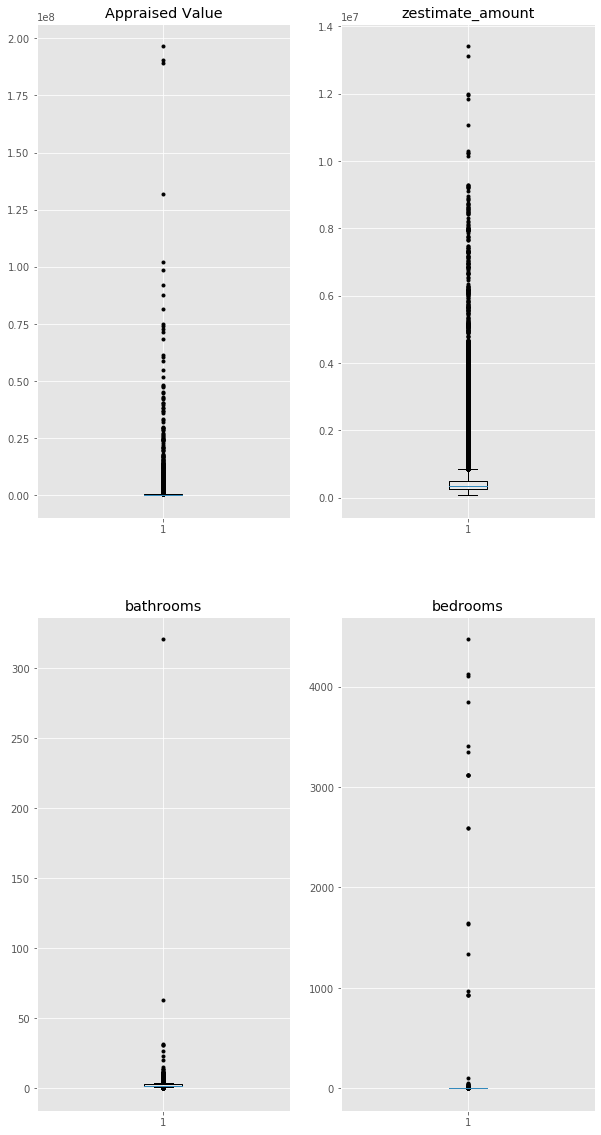

In [84]:
fig = plt.figure(figsize=(10,20))

plt.subplot(2, 2, 1)
plt.boxplot(df["Appraised Value"], sym='k.')
plt.title("Appraised Value")

plt.subplot(2, 2, 2)
plt.boxplot(df["zestimate_amount"], sym='k.')
plt.title("zestimate_amount")

plt.subplot(2, 2, 3)
plt.boxplot(df["bathrooms"], sym='k.')
plt.title("bathrooms")

plt.subplot(2, 2, 4)
plt.boxplot(df["Beds"], sym='k.')
plt.title("bedrooms")


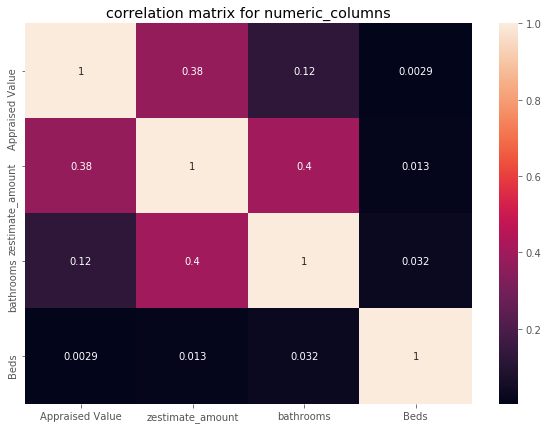

In [86]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_columns].corr(),  annot=True, xticklabels=1, yticklabels=1)
plt.title("correlation matrix for numeric_columns")
plt.show()

In [89]:
df[df['Appraised Value'] >125000000]

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode,Appraised Value,Beds
82883,Condominium,1410,2,30.270114,-97.747547,600680,1964,210 W 7 ST TX,78701,196617739,2
85288,SingleFamily,3850,2,30.274789,-97.747461,1930547,1910,W 11 ST TX,78701,188992265,3
110591,MultiFamily2To4,242666,0,30.288215,-97.743438,5924657,2012,2400 NUECES ST TX,78705,132084731,2
114942,Condominium,1232,2,30.262502,-97.727073,573782,2006,500 E CESAR CHAVEZ ST TX,78702,190559304,1


In [90]:
df.drop(df[df['Appraised Value'] < 50000].index, inplace = True)
df.drop(df[df['Appraised Value'] > 12500000].index, inplace = True)
df.drop(df[df['bathrooms'] > 8].index, inplace = True)
df.drop(df[df['bathrooms'] < 1].index, inplace = True)
df.drop(df[df['Beds'] > 10].index, inplace = True)

/Users/anastasia/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, 'bedrooms')

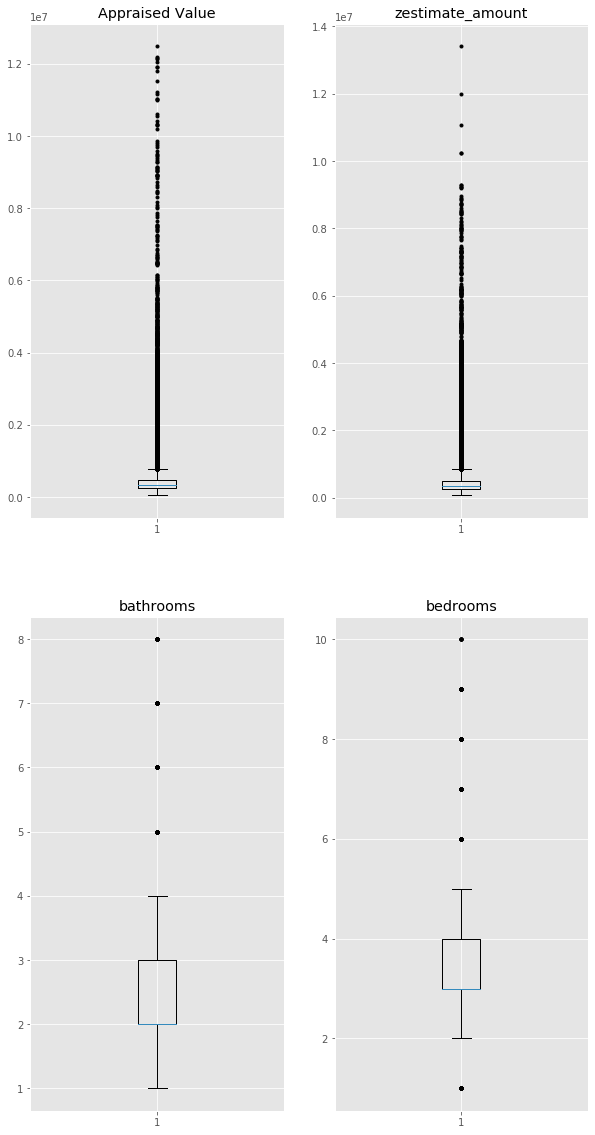

In [91]:
fig = plt.figure(figsize=(10,20))

plt.subplot(2, 2, 1)
plt.boxplot(df["Appraised Value"], sym='k.')
plt.title("Appraised Value")

plt.subplot(2, 2, 2)
plt.boxplot(df["zestimate_amount"], sym='k.')
plt.title("zestimate_amount")

plt.subplot(2, 2, 3)
plt.boxplot(df["bathrooms"], sym='k.')
plt.title("bathrooms")

plt.subplot(2, 2, 4)
plt.boxplot(df["Beds"], sym='k.')
plt.title("bedrooms")


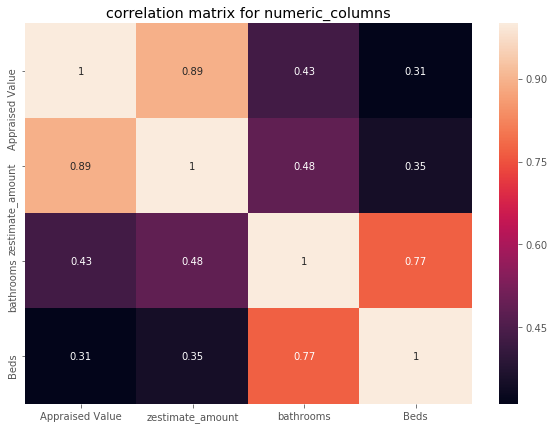

In [92]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_columns].corr(),  annot=True, xticklabels=1, yticklabels=1)
plt.title("correlation matrix for numeric_columns")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e4cea10>,
      dtype=object)

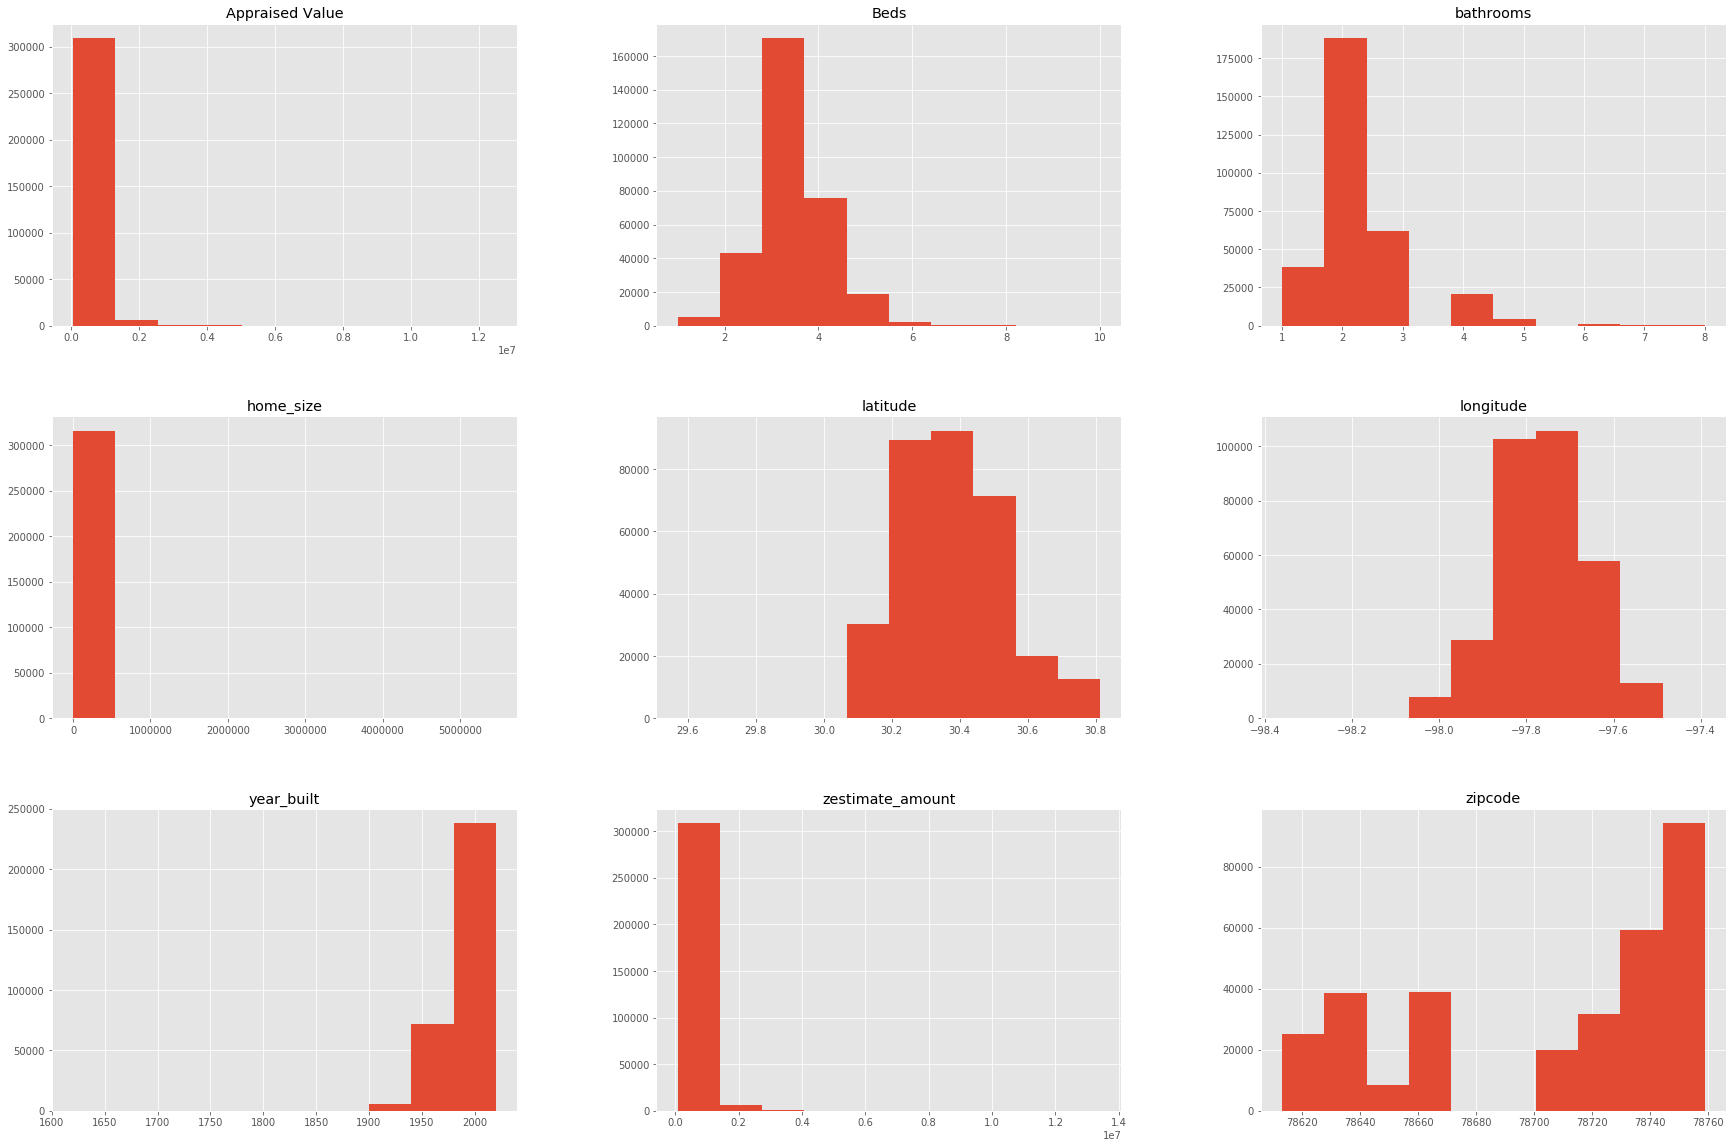

In [93]:
df.hist(figsize=(30,20))

In [98]:
df[df['home_size'] > 10000].sort_values('home_size')

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,address,zipcode,Appraised Value,Beds
4382,SingleFamily,10001,6,30.318249,-97.789106,5094034,2001,4500 MANTLE DR TX,78746,3284200,7
49940,SingleFamily,10011,6,30.263510,-97.866334,4377200,2006,4429 MIRADOR DR TX,78735,3870861,5
324058,SingleFamily,10017,7,30.300836,-97.771524,5188681,2009,2509 TARRYHILL PL TX,78703,4346800,8
25978,SingleFamily,10018,2,30.375686,-97.848919,666765,1994,5217 CHINA GARDEN DR TX,78730,564000,4
51236,SingleFamily,10030,6,30.264650,-97.868351,3277143,2007,4500 MIRADOR DR TX,78735,2605849,5
...,...,...,...,...,...,...,...,...,...,...,...
257277,SingleFamily,124503,2,30.538026,-97.856401,289093,2004,"1323 TUMBLING RIVER DR, LEANDER, TX",78641,264449,3
220779,SingleFamily,149000,2,30.223775,-97.692363,324729,2006,1501 POPPY SEED LN TX,78741,236368,3
169302,SingleFamily,680000,5,30.287929,-97.580792,1285663,2001,8108 HOG EYE RD TX,78653,1346029,4
314104,MultiFamily2To4,999999,2,30.199598,-97.748646,253831,1973,2309 TERI RD TX,78744,248123,3


In [99]:
df.drop(df[df['Appraised Value'] < 50000].index, inplace = True)
df.drop(df[df['Appraised Value'] > 12500000].index, inplace = True)
df.drop(df[df['bathrooms'] > 8].index, inplace = True)
df.drop(df[df['bathrooms'] < 1].index, inplace = True)
df.drop(df[df['Beds'] > 10].index, inplace = True)
df.drop(df[df['home_size'] > 10000].index, inplace = True)


/Users/anastasia/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14b906790>,
      dtype=object)

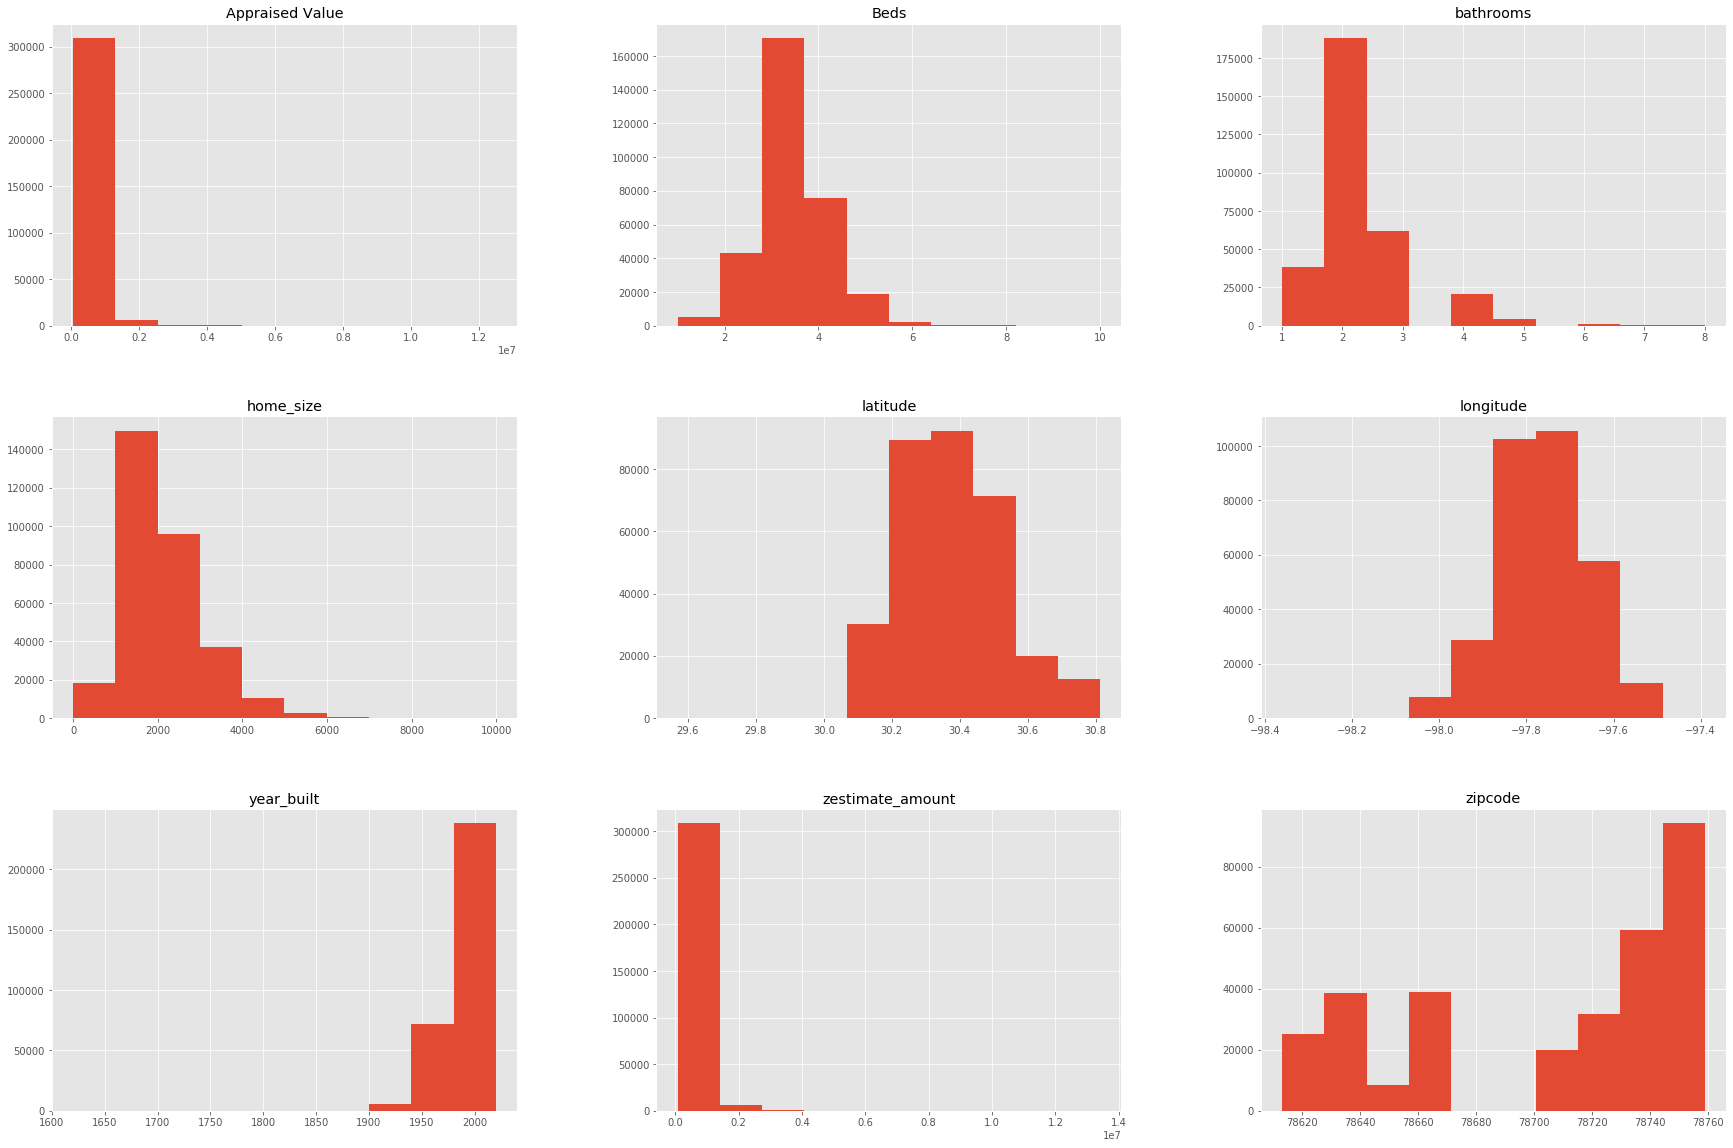

In [100]:
df.hist(figsize=(30,20))

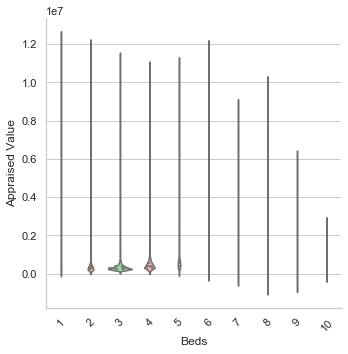

In [101]:
sns.set(style="whitegrid", palette="pastel")
g = sns.catplot(x="Beds", y="Appraised Value",
            kind="violin",scale='count', inner='quartile', data=df);
plt.title('')

g.set_xticklabels(rotation=45)

In [120]:
del df['zestimate_amount'] 

In [121]:
df[df['zipcode']==78613].describe()

,home_size,bathrooms,latitude,longitude,year_built,zipcode,Appraised Value,Beds
count,22488.000000,22488.000000,22488.000000,22488.000000,22488.000000,22488.0,2.248800e+04,22488.000000
mean,2400.722919,2.461668,30.501790,-97.826771,2000.287309,78613.0,3.351648e+05,3.474431
std,850.125969,0.724424,0.023509,0.028860,10.062235,0.0,1.777156e+05,0.693960
min,1.000000,1.000000,30.451180,-97.882053,1900.000000,78613.0,5.000000e+04,1.000000
25%,1733.000000,2.000000,30.480669,-97.847804,1995.000000,78613.0,2.506758e+05,3.000000
50%,2270.000000,2.000000,30.507105,-97.833192,2001.000000,78613.0,3.027785e+05,3.000000
75%,2952.250000,3.000000,30.521228,-97.815179,2007.000000,78613.0,3.863775e+05,4.000000
max,9082.000000,8.000000,30.579623,-97.749708,2020.000000,78613.0,1.116438e+07,9.000000


In [122]:
df

,home_type,home_size,bathrooms,latitude,longitude,year_built,address,zipcode,Appraised Value,Beds
1,SingleFamily,1714,2,30.283120,-97.801518,1972,503 HONEYCOMB RDG TX,78746,1217527,3
2,SingleFamily,2045,2,30.277183,-97.789601,1982,3211 PARK HILLS DR TX,78746,1084753,4
3,SingleFamily,3018,4,30.281878,-97.787439,1984,3309 PARK HILLS DR TX,78746,1126000,5
4,SingleFamily,3352,3,30.288623,-97.839915,1989,6500 MINIKAHDA CV TX,78746,818000,5
5,SingleFamily,3602,4,30.328302,-97.805591,1989,3200 LOOKOUT LN TX,78746,871722,4
...,...,...,...,...,...,...,...,...,...,...
369947,SingleFamily,2059,2,30.508553,-97.657625,2015,"1700 WILLOW VIS, ROUND ROCK, TX",78664,259447,3
369948,SingleFamily,2570,2,30.505162,-97.602069,2002,"3702 HARVEY PENICK CV, ROUND ROCK, TX",78664,315818,3
369949,SingleFamily,2114,2,30.501361,-97.656276,2004,"1810 THOMPSON TRL, ROUND ROCK, TX",78664,253668,3
369950,SingleFamily,1072,2,30.495407,-97.660782,1997,"1505 CINDY CT, ROUND ROCK, TX",78664,182904,3


In [123]:
df.to_csv('Desktop/Project Austin/house_price_zillow.csv')